# Phase 2: Build a Supervised Learning Model 
In this phase, two supervised machine learning models were developed using the preprocessed dataset. The goal was to apply, justify, and compare their performance to identify which algorithm provides the most accurate predictions of students’ sleep quality.


## 1. Algorithm Selection & Justification

### 1.1 Random Forest 

The Random Forest Classifier was selected due to its robustness and ability to handle both numerical and categorical data effectively. It works by combining multiple decision trees to create an ensemble that reduces overfitting and improves predictive accuracy.
This algorithm is particularly suitable for our dataset, which includes various behavioral and lifestyle features (e.g., sleep duration, study hours, caffeine intake, physical activity). Random Forest captures non-linear relationships between these features and provides insights into which factors have the most influence on sleep quality through feature importance analysis.
Additionally, its ensemble nature ensures better stability and generalization, making it a reliable baseline for comparison with other models.

To prepare the data for training, preprocessing steps included:

OneHot Encoding for categorical features (e.g., sleep start time).

Standard Scaling for numerical features to normalize values.

SMOTE (Synthetic Minority Oversampling Technique) to handle class imbalance between sleep quality categories.

An 80/20 train-test split to ensure fair evaluation and prevent overfitting.

### 1.2 Support Vector Machine (SVM)

The Support Vector Machine (SVM) algorithm was chosen to provide a contrasting approach that focuses on finding the best separating boundary (hyperplane) between different sleep quality classes.
SVM performs well on medium-sized datasets and is known for its strength in handling high-dimensional data and distinguishing between overlapping classes. The RBF kernel (Radial Basis Function) was used to capture non-linear decision boundaries, allowing the model to adapt to the complex relationships between features such as sleep habits and study patterns.

The same preprocessing techniques were applied to maintain consistency across models:

OneHot Encoding for categorical variables.

Standard Scaling for numerical data.

SMOTE for balancing the dataset.

Train-test split (80/20) to ensure comparability with the Random Forest model.

## 2. Algorithm Implementation

### 2.1 Building a Random Forest Model

The Random Forest algorithm was implemented to classify students’ sleep quality based on multiple lifestyle and demographic factors. It was selected because it performs well on medium-sized datasets, handles both numeric and categorical variables, and captures complex, non-linear interactions between features such as study hours, caffeine intake, and sleep duration. By combining multiple decision trees, Random Forest reduces overfitting and provides a stable, reliable prediction of sleep quality.

#### 2.1.1 Installing Required Libraries

In [32]:
!pip install scikit-learn
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### 2.1.2 Random Forest Model Development and Execution

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# -------------------------------------------
# 1. Load the preprocessed dataset
# -------------------------------------------
df = pd.read_csv("../Dataset/student_sleep_patterns_preprocessed.csv")

# -------------------------------------------
# 2. Encode the target variable only
# -------------------------------------------
label_encoder = LabelEncoder()
df["Sleep_Quality"] = label_encoder.fit_transform(df["Sleep_Quality"])

# -------------------------------------------
# 3. Identify categorical and numerical columns
# -------------------------------------------
categorical_cols = ["Weekday_Sleep_Start", "Weekend_Sleep_Start",
                    "Weekday_Sleep_End", "Weekend_Sleep_End"]
numerical_cols = [col for col in df.columns if col not in categorical_cols + ["Sleep_Quality"]]

# -------------------------------------------
# 4. Preprocessing for model training (OneHot + Scaling)
# -------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# -------------------------------------------
# 5. Split features and target
# -------------------------------------------
X = df.drop("Sleep_Quality", axis=1)
y = df["Sleep_Quality"]

# Apply preprocessing transformations
X_processed = preprocessor.fit_transform(X)

# -------------------------------------------
# 6. Handle imbalance using SMOTE
# -------------------------------------------
smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X_processed, y)

# -------------------------------------------
# 7. Split data into 80% train / 20% test
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# -------------------------------------------
# 8. Train the Random Forest model (tuned)
# -------------------------------------------
rf = RandomForestClassifier(
    n_estimators=800,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced_subsample',
    bootstrap=True,
    random_state=42
)
rf.fit(X_train, y_train)

# -------------------------------------------
# 9. Make predictions
# -------------------------------------------
y_pred = rf.predict(X_test)

# -------------------------------------------
# 10. Decode labels back to original classes
# -------------------------------------------
decoded_true = label_encoder.inverse_transform(y_test)
decoded_pred = label_encoder.inverse_transform(y_pred)

# -------------------------------------------
# 11. Create a readable DataFrame using the original (non-encoded) features
# -------------------------------------------
X_display = X.sample(n=len(X_test), random_state=42).reset_index(drop=True)

results_df = pd.DataFrame({
    "Actual Sleep Quality": decoded_true,
    "Predicted Sleep Quality": decoded_pred
})

results_df = pd.concat([results_df, X_display], axis=1)

# -------------------------------------------
# 12. Display the first 25 rows clearly
# -------------------------------------------
print("Final Model Predictions with Original Feature Values (first 25 rows):")
display(results_df.head(25))


Final Model Predictions with Original Feature Values (first 25 rows):


,Actual Sleep Quality,Predicted Sleep Quality,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,Poor,Good,18,0,3,7.5,9.2,3.0,3,16,Late,Late,Early,Early
1,Average,Poor,19,2,3,4.1,2.0,1.0,2,83,Medium,Early,Early,Early
2,Good,Good,18,1,2,4.1,3.7,2.3,4,57,Late,Medium,Early,Early
3,Average,Poor,19,2,2,4.4,0.1,2.4,3,27,Early,Early,Early,Medium
4,Poor,Poor,19,0,3,8.9,5.9,2.7,2,56,Medium,Early,Early,Early
5,Good,Good,20,1,1,6.2,3.6,1.3,3,67,Late,Medium,Early,Early
6,Average,Average,18,0,1,7.9,1.3,3.8,2,19,Late,Early,Early,Medium
7,Poor,Average,22,1,2,4.9,10.4,2.8,3,71,Late,Late,Early,Early
8,Poor,Poor,21,2,1,5.5,5.2,2.8,4,99,Late,Early,Early,Early
9,Average,Poor,23,0,2,4.7,3.1,2.9,0,92,Late,Late,Early,Early


### 2.2 Building a Support Vector Machine (SVM) Model
The Support Vector Machine (SVM) algorithm was implemented to classify students’ sleep quality based on behavioral and lifestyle features. SVM is effective on medium-sized datasets and can model complex relationships using kernel functions. It works by finding the best boundary that separates different sleep quality categories.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


# 1. Load the preprocessed dataset

df = pd.read_csv("../Dataset/student_sleep_patterns_preprocessed.csv")


# 2. Encode target variable

label_encoder = LabelEncoder()
df["Sleep_Quality"] = label_encoder.fit_transform(df["Sleep_Quality"])


# 3. Identify categorical and numerical columns

categorical_cols = ["Weekday_Sleep_Start", "Weekend_Sleep_Start",
                    "Weekday_Sleep_End", "Weekend_Sleep_End"]
numerical_cols = [col for col in df.columns if col not in categorical_cols + ["Sleep_Quality"]]


# 4. Preprocessing (OneHot + Scaling)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

X = df.drop("Sleep_Quality", axis=1)
y = df["Sleep_Quality"]

X_processed = preprocessor.fit_transform(X)


# 5. Handle imbalance using SMOTE

smote = SMOTE(random_state=42, k_neighbors=3)
X_balanced, y_balanced = smote.fit_resample(X_processed, y)


# 6. Train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)


# 7. Train SVM Model

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# 8. Predict

y_pred = svm_model.predict(X_test)

# Decode labels
decoded_true = label_encoder.inverse_transform(y_test)
decoded_pred = label_encoder.inverse_transform(y_pred)


# 9. Display Predictions with Original Feature Values

X_display = X.sample(n=len(X_test), random_state=42).reset_index(drop=True)

results_df = pd.DataFrame({
    "Actual Sleep Quality": decoded_true,
    "Predicted Sleep Quality": decoded_pred
})

results_df = pd.concat([results_df, X_display], axis=1)


# ✅ Show first 25 rows only

print("SVM Predictions with Original Feature Values (first 25 rows):")
display(results_df.head(25))

SVM Predictions with Original Feature Values (first 25 rows):


,Actual Sleep Quality,Predicted Sleep Quality,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,Poor,Good,18,0,3,7.5,9.2,3.0,3,16,Late,Late,Early,Early
1,Average,Poor,19,2,3,4.1,2.0,1.0,2,83,Medium,Early,Early,Early
2,Good,Good,18,1,2,4.1,3.7,2.3,4,57,Late,Medium,Early,Early
3,Average,Poor,19,2,2,4.4,0.1,2.4,3,27,Early,Early,Early,Medium
4,Poor,Poor,19,0,3,8.9,5.9,2.7,2,56,Medium,Early,Early,Early
5,Good,Good,20,1,1,6.2,3.6,1.3,3,67,Late,Medium,Early,Early
6,Average,Average,18,0,1,7.9,1.3,3.8,2,19,Late,Early,Early,Medium
7,Poor,Average,22,1,2,4.9,10.4,2.8,3,71,Late,Late,Early,Early
8,Poor,Average,21,2,1,5.5,5.2,2.8,4,99,Late,Early,Early,Early
9,Average,Average,23,0,2,4.7,3.1,2.9,0,92,Late,Late,Early,Early


## 3. Algorithm Evaluation & Comparison
 ## 3.1 Random Forest Model 
Train-Test Split (80/20)
The dataset was divided into 80% for training and 20% for testing to evaluate how well the model generalizes to unseen data. This step ensures that the performance metrics reflect true predictive ability rather than overfitting or memorization.This process was implemented earlier in the Random Forest model under Step 7 of the code: X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)
 ## Evaluation Metrics Overview
To measure the model’s predictive performance, multiple metrics were used. Each captures a different aspect of classification quality.
## 1. Accuracy 
Measures how often the model predicts correctly across all classes.

In [3]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Result: The Random Forest model achieved an accuracy of {round(accuracy * 100, 2)}%, indicating that the model correctly predicted students’ sleep quality for most test samples.")

Result: The Random Forest model achieved an accuracy of 62.5%, indicating that the model correctly predicted students’ sleep quality for most test samples.


## 2. Precision 
Measures how many of the predicted labels for each class were actually correct 

In [4]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='macro')
print(f"Result: The Random Forest model achieved a precision score of {round(precision * 100, 2)}%, indicating how accurately it identified each sleep quality class.")

Result: The Random Forest model achieved a precision score of 63.11%, indicating how accurately it identified each sleep quality class.


## 3. Recall 
Measures how well the model identifies all actual positive cases. 

In [5]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='macro')
print(f"Result: The Random Forest model achieved a recall score of {round(recall * 100, 2)}%, reflecting the model’s ability to correctly identify all true cases of each sleep quality category.")

Result: The Random Forest model achieved a recall score of 62.5%, reflecting the model’s ability to correctly identify all true cases of each sleep quality category.


## 4. F1-Score
Combines Precision and Recall into a single score to balance both accuracy and completeness 

In [6]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='macro')
print(f"Result: The Random Forest model achieved an F1-score of {round(f1 * 100, 2)}%, demonstrating a balanced performance between precision and recall across all sleep quality categories.")

Result: The Random Forest model achieved an F1-score of 62.59%, demonstrating a balanced performance between precision and recall across all sleep quality categories.


## 5. ROC-AUC Score 
Measures the model’s ability to distinguish between different classes.

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred, classes=[0, 1, 2])

roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro')
print(f"Result: The Random Forest model achieved an ROC-AUC score of {round(roc_auc * 100, 2)}%, indicating the model’s overall ability to distinguish between different sleep quality categories.")

Result: The Random Forest model achieved an ROC-AUC score of 71.87%, indicating the model’s overall ability to distinguish between different sleep quality categories.


## Model Performance Analysis and Visualization
## 1. Confusion Matrix
The Confusion Matrix provides a detailed view of the model’s classification results by comparing actual versus predicted labels for each class. 

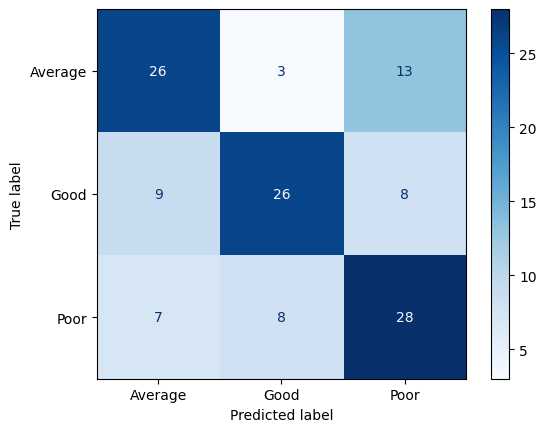

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.show()

## 2. Visualization of Random Forest Performance Metrics
This visualization summarizes the performance of the Random Forest model across multiple evaluation metrics are  Accuracy, Precision, Recall, F1-Score, and ROC-AUC.


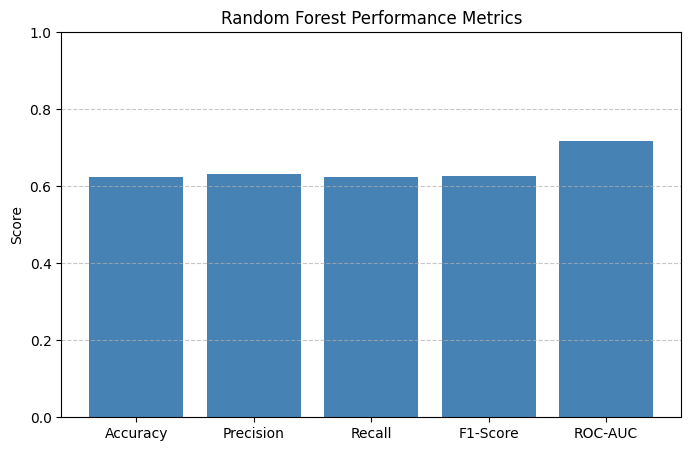

In [12]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
scores = [0.625, 0.6311, 0.625, 0.6259, 0.7187]

plt.figure(figsize=(8,5))
plt.bar(metrics, scores, color='steelblue')
plt.title('Random Forest Performance Metrics')
plt.ylabel('Score')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Results Interpretation